In [1]:
import os
import numpy as np
import pandas as pd
import random

# Plot
import matplotlib.pyplot as plt

# PyTorch and TorchVision
import torch
import torchvision

# Nibabel
import nibabel as nib

In [2]:
# User Variables

directory_list = []
image_directory = './Dataset_1/tr_im.nii'
lung_mask_directory = './Dataset_1/tr_lungmasks_updated.nii'
covid_mask_directory = './Dataset_1/tr_mask.nii'
# validation_directory = '/content/val_im.nii'
directory_list.extend([image_directory,lung_mask_directory,covid_mask_directory])

# patient selection
random_list = []
for i in range(10):
  num = random.randint(1,100)
  random_list.append(num)
print(random_list)

[89, 90, 44, 50, 34, 64, 27, 77, 47, 56]


In [3]:
# Check the shape of image and masks
image = nib.load(image_directory)
image = image.get_fdata()
print('Image shape:', image.shape)
lung_mask = nib.load(lung_mask_directory)
lung_mask = lung_mask.get_fdata()
print('Lung mask shape:', lung_mask.shape)
image_mask = nib.load(covid_mask_directory)
image_mask = image_mask.get_fdata()
print('Image mask shape:', image_mask.shape)
# validation = nib.load(validation_directory)
# validation = validation.get_fdata()
# print('Validation image shape:', validation.shape)

Image shape: (512, 512, 100)
Lung mask shape: (512, 512, 100)
Image mask shape: (512, 512, 100)


<>:41: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:41: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-4-f90b5d84b2e3>:41: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if j is not 0:


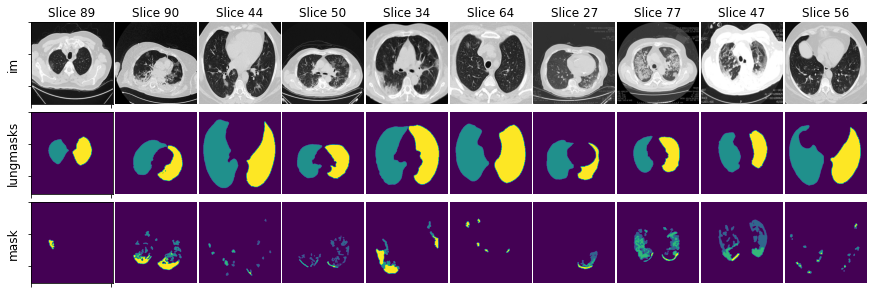

In [4]:
# Plot Image Grid
# Quilt rows and columns
nRows = 3
nCols = 10
# Spacers
wspace = 0
hspace = 0.10
# Quilt width and height
figsize_x = 15+(wspace*nCols)
figsize_y = 15*(nRows/nCols)+(hspace*nRows)

# Plotting
# Plot Tiles
fig, ax = plt.subplots(nrows=nRows, ncols=nCols, 
                       figsize=(figsize_x, figsize_y),
                       gridspec_kw={'wspace': wspace, 'hspace': hspace})
# Rows and Cols label
colnames = ['Slice {}'.format(c) for c in random_list]
for axs, c in zip(ax[0], colnames):
  axs.set_title(c)

rownames = []
for n in directory_list:
  name = n.split('/')[2][:-4]
  name = name.split('_')[1]
  rownames.append(name)
for axs, r in zip(ax[:,0], rownames):
  axs.set_ylabel(r, rotation=90, size='large')

# Iterate through images
for i in range(nRows):
  data = nib.load(directory_list[i])
  data = data.get_fdata()
  for j in range(nCols):
    current_slice = data[:,:,random_list[j]]
    # first row grayscale
    if i == 0:
      ax[i,j].imshow(np.moveaxis(current_slice,0,-1), cmap="gray")
    else:
      ax[i,j].imshow(np.moveaxis(current_slice,0,-1))
    if j is not 0:
      ax[i,j].axis('off')
    else:
      ax[i,j].axes.xaxis.set_ticklabels([])
      ax[i,j].axes.yaxis.set_ticklabels([])